# analyze data
偷看一下這次要用的資料長甚麼樣子。

In [33]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt
%matplotlib inline

把資料讀進來，把不需要的userid和有NaN的資料drop掉。
另外因為原本的column name是編號，所以按照意思把他們改成比較好懂的英文單字。

In [2]:
df = pd.read_csv("google_review_ratings.csv")
df = df.drop('User', 1)
df.columns = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_and_spas', 'cafes', 'view_points', 'monuments', 'gardens']
df = df.dropna(0, 'any')
df = df.reset_index(drop=True)
df.head()

把資料存成float type，再轉成ndarray的type。

In [3]:
df = df.astype(float)
X = df[['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_and_spas', 'cafes', 'view_points', 'monuments', 'gardens']].values

隨便分個兩群，看看資料分布的形狀。 看起來如果只分兩群的話，用圖也可以看出分群的區域。但如果要分好多好多群，用這樣的圖可能就沒辦法看出東西。

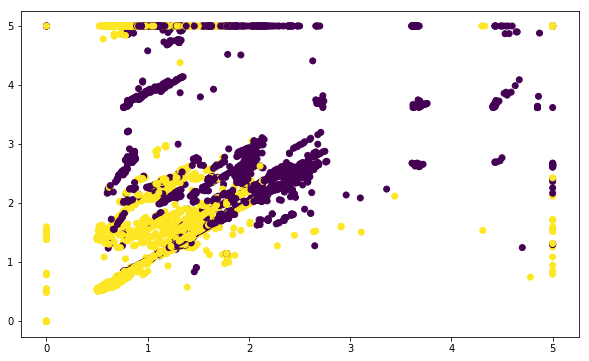

array([[1.84011072, 2.74030842, 3.02189008, 3.41972716, 3.47043891,
        2.96088968, 2.64750494, 1.98123764, 2.27449189, 2.12759193,
        1.93930407, 1.6832503 , 1.65035192, 1.46417556, 1.59843812,
        1.25638197, 1.06098062, 0.99221827, 1.30116251, 1.33716489,
        1.27504152, 2.58615263, 2.2102412 , 2.09082246],
       [1.1234188 , 1.95668376, 2.02836581, 2.25877265, 2.51662222,
        2.8350906 , 3.96014017, 3.0253094 , 3.86323761, 3.44233846,
        3.07731282, 2.4200547 , 2.53691624, 2.81835897, 2.73156923,
        1.13765812, 0.85283077, 0.67580513, 0.6822735 , 0.70778462,
        0.69744615, 1.02582906, 0.94381197, 1.10210598]])

In [32]:
K = 2
km = KMeans(n_clusters = K)
y_pred = km.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred) #C是第三維度 顏色做維度
plt.show()

km.cluster_centers_ #各群中心點(X,Y)的位置

算出每一個景點的平均分數偷看一下。如果平均分數有2~3分的話，代表這個景點在這些使用者中有一定的支持度和評論分數，才有辦法拿到這個平均分數。如果平均分數只有0.幾的，可能就表示這個景點在這筆資料中的分數大多是低分，有需要的話可以優先考慮把這個景點拿掉。

In [5]:
# add category mean
df_T = df.T
df_T.insert(loc = 0, column='category_mean', value=df_T.mean(axis=1))
df = df_T.T
df_T

,category_mean,0,1,2,3,4,5,6,7,8,...,5444,5445,5446,5447,5448,5449,5450,5451,5452,5453
churches,1.455746,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.32,4.59,4.60,1.65,0.91,0.91,0.93,0.94,0.95,0.95
resorts,2.320048,0.00,0.00,0.00,0.50,0.00,0.00,5.00,5.00,5.00,...,3.87,3.88,5.00,3.93,3.94,5.00,5.00,5.00,4.05,4.07
beaches,2.489059,3.63,3.63,3.63,3.63,3.63,3.63,3.63,3.63,3.64,...,3.91,3.92,3.94,3.96,3.98,4.00,4.02,4.03,4.05,5.00
parks,2.797103,3.65,3.65,3.63,3.63,3.63,3.63,3.63,3.63,3.64,...,2.75,2.76,2.77,2.77,2.78,2.79,2.79,2.80,2.81,2.82
theatres,2.958904,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,2.74,2.74,2.75,2.76,2.76,2.77,2.78,2.78,2.79,2.80
museums,2.893423,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.92,...,2.33,2.33,2.69,2.34,2.57,2.57,2.57,2.57,2.44,2.57
malls,3.351476,5.00,5.00,5.00,5.00,5.00,5.00,3.03,5.00,3.03,...,2.45,2.45,2.45,2.44,2.44,2.43,1.77,1.75,1.76,2.42
zoo,2.541177,2.35,2.64,2.64,2.35,2.64,2.63,2.35,2.63,2.62,...,1.18,1.16,1.14,1.13,1.11,1.09,1.07,1.05,1.03,1.02
restaurants,3.126542,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.32,...,5.00,5.00,1.13,1.79,1.78,1.77,1.76,1.75,1.74,1.74
pubs_bars,2.832695,2.64,2.65,2.64,2.64,2.64,2.65,2.64,2.64,2.63,...,1.13,1.11,1.10,1.08,1.06,1.04,1.02,1.00,0.98,0.96


找每一個景點0~5各個分數的數量。先把整個dataframe轉成int type，再一個一個觀察。

可以看到在這些資料中，0分和1分的比例算是比較高的。我想在這種情況下，偏高分的345分的重要性就會提高。也就是當分完群之後，群中比較高分的景點可能就有足夠代表這個群體的重要程度與重要性。

In [6]:
# count 0~5
df_int = df.astype(int)

In [7]:
df_int['churches'].value_counts()

1    2720
0    1608
2     928
3      68
5      67
4      64
Name: churches, dtype: int64

In [8]:
df_int['resorts'].value_counts()

1    2094
2    1491
5     880
0     704
3     170
4     116
Name: resorts, dtype: int64

In [9]:
df_int['beaches'].value_counts()

1    2430
2    1751
5     812
3     242
4     132
0      88
Name: beaches, dtype: int64

In [10]:
df_int['parks'].value_counts()

1    2020
2    1765
5    1067
4     326
3     272
0       5
Name: parks, dtype: int64

In [11]:
df_int['theatres'].value_counts()

1    1944
2    1432
5    1233
3     527
4     319
Name: theatres, dtype: int64

In [12]:
df_int['museums'].value_counts()

1    1919
2    1368
5    1044
3     845
4     279
Name: museums, dtype: int64

In [13]:
df_int['malls'].value_counts()

5    1939
1    1468
2     939
3     888
4     221
Name: malls, dtype: int64

In [14]:
df_int['zoo'].value_counts()

1    2368
2    1378
3     895
5     417
4     334
0      63
Name: zoo, dtype: int64

In [15]:
df_int['restaurants'].value_counts()

2    1547
1    1530
5    1474
3     642
4     222
0      40
Name: restaurants, dtype: int64

In [16]:
df_int['pubs_bars'].value_counts()

2    1741
1    1689
5    1064
3     733
0     147
4      81
Name: pubs_bars, dtype: int64

In [17]:
df_int['local_services'].value_counts()

1    2270
2    1279
5    1045
0     452
3     319
4      90
Name: local_services, dtype: int64

In [18]:
df_int['burger_pizza_shops'].value_counts()

1    2671
2    1014
0     929
5     592
3     197
4      52
Name: burger_pizza_shops, dtype: int64

In [19]:
df_int['hotels_other_lodgings'].value_counts()

1    2749
0    1094
5     898
2     567
3     130
4      17
Name: hotels_other_lodgings, dtype: int64

In [20]:
df_int['juice_bars'].value_counts()

1    2504
0    1264
5    1153
2     364
3     136
4      34
Name: juice_bars, dtype: int64

In [21]:
df_int['art_galleries'].value_counts()

0    1881
1    1819
5    1320
3     197
2     169
4      69
Name: art_galleries, dtype: int64

In [22]:
df_int['dance_clubs'].value_counts()

0    3648
1    1329
5     335
3      82
2      41
4      20
Name: dance_clubs, dtype: int64

In [23]:
df_int['swimming_pools'].value_counts()

0    4300
1     830
5     244
2      52
3      28
4       1
Name: swimming_pools, dtype: int64

In [24]:
df_int['gyms'].value_counts()

0    4624
1     502
5     202
2     113
4      10
3       4
Name: gyms, dtype: int64

In [25]:
df_int['bakeries'].value_counts()

0    4460
1     399
5     349
2     192
3      31
4      24
Name: bakeries, dtype: int64

In [26]:
df_int['beauty_and_spas'].value_counts()

0    4435
1     378
5     319
2     211
3      67
4      45
Name: beauty_and_spas, dtype: int64

In [27]:
df_int['cafes'].value_counts()

0    4061
1     928
2     207
5     108
4     105
3      46
Name: cafes, dtype: int64

In [28]:
df_int['view_points'].value_counts()

0    2618
1    1411
5     733
2     283
4     265
3     145
Name: view_points, dtype: int64

In [29]:
df_int['monuments'].value_counts()

0    2332
1    2023
5     456
2     387
3     156
4     101
Name: monuments, dtype: int64

In [30]:
df_int['gardens'].value_counts()

1    2725
0    1761
2     421
5     368
3     102
4      78
Name: gardens, dtype: int64